In [260]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import random
import matplotlib.pyplot as plt
from solver_tools import *
from vrp_tests import get_problem_by_filename

plt.rcParams["figure.figsize"] = (20,10)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [263]:
def test_sa():
    #random.seed(0)
    # ('vrp_16_3_1', 'vrp_26_8_1', 'vrp_51_5_1', 'vrp_101_10_1', 'vrp_200_16_1', 'vrp_421_41_1')
    problem = get_problem_by_filename('vrp_421_41_1')
    #solver = SASolver(t_min=2, t_max=100000.0, alpha=0.99996, improvement_limit=100000, debug=True)
    solver = SASolver2(t_min=2, t_max=100000.0, alpha=0.99996, improvement_limit=200000, refinement_loops=100000, debug=True)
    #solver = MultiSolver(solvers=[SASolver(t_max=10000.0, improvement_limit=50000, debug=True)], timeout=600)
    #solver = ILSVRPSolver(max_dives=200, max_diving_iters=800, debug=True)    
    #solver = ILSVRPSolver2(max_failed_dives=30, depth_multiplier=1.02, refinement_loops=30000, initial_depth=500, debug=True)
    print(solver)
    return solver._solve(problem), solver    
   
solution, solver = test_sa()

<SASolver2(t_min=2, t_max=100000.0, alpha=0.99996, improvement_limit=200000, refinement_loops=100000)>


solution final 2808.2847848590773


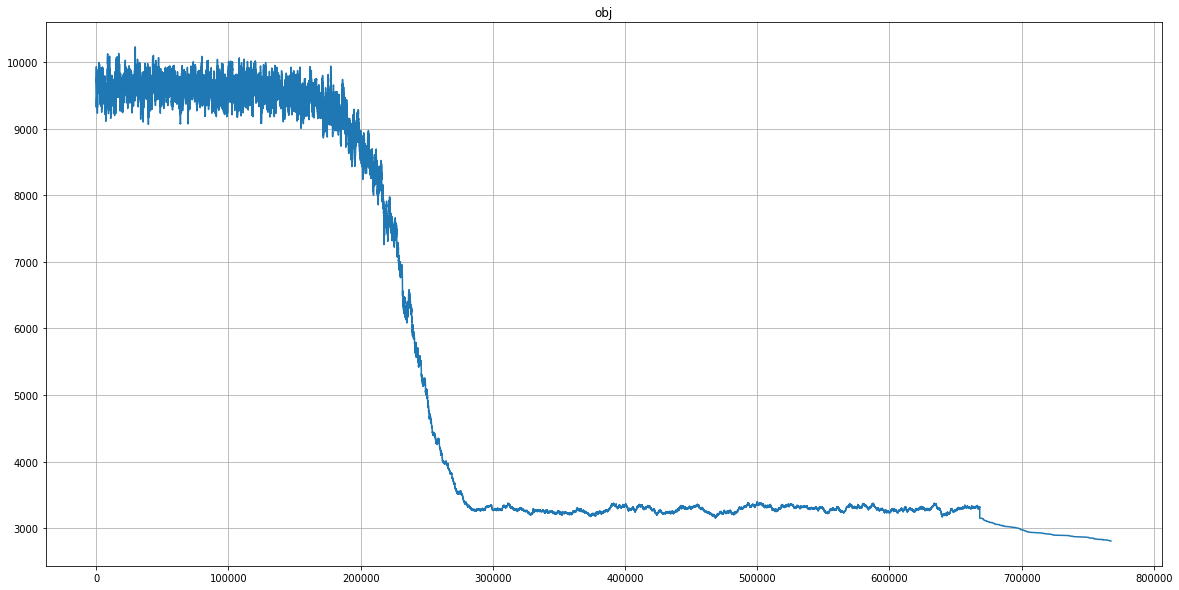

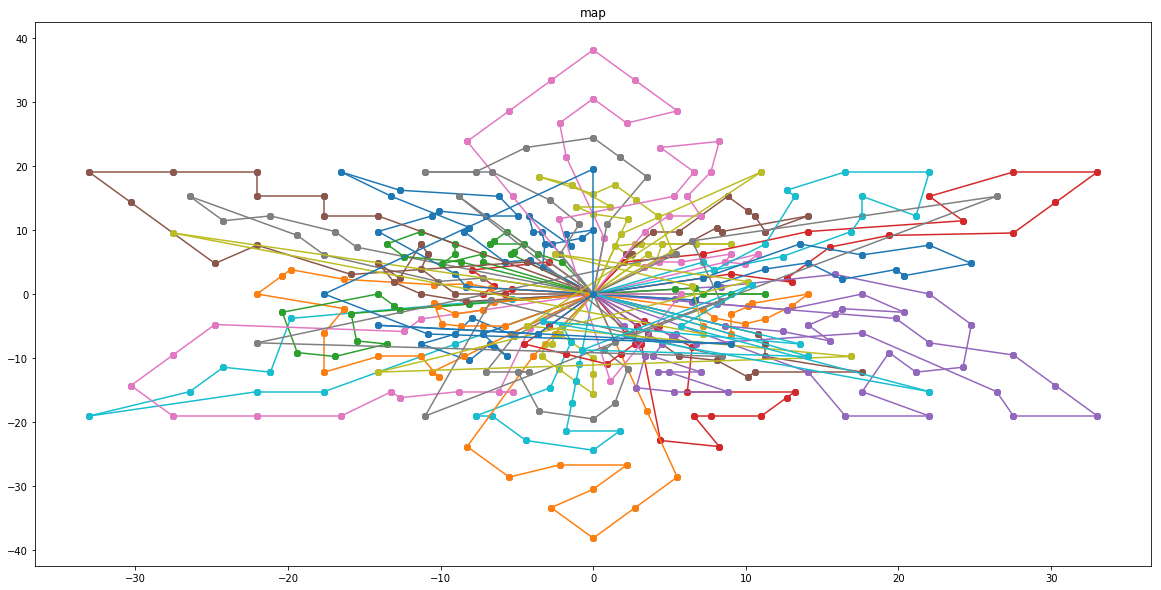

In [264]:
def plot(solution, solver):
    x = solution.stats.improvements_x
    y = solution.stats.improvements_y
    print('solution final', solution.stats.final_value)
    
    fig = plt.figure()
    #plt.loglog(x, y)    
    plt.plot(x, y)
    #plt.plot(solution.stats.dives_x, solution.stats.dives_y, '*', markersize=20)
    #plt.xlim([2000, 15000])
    #plt.ylim([0, 60000])
    plt.grid()
    plt.title('obj')
    
    #fig = plt.figure()
    #plt.plot(list(range(len(solution.stats.temperature))), solution.stats.temperature)
    #plt.yscale('log')
    #plt.grid()
    #plt.title('temp')
    
    #fig = plt.figure()
    #plt.plot(list(range(len(solution.stats.probs))), solution.stats.probs, '.', alpha=0.3)
    #plt.grid()
    #plt.title('probs')
    
    #fig = plt.figure()
    #plt.plot(solution.stats.dives_x, solution.stats.dives_y, '+')
    #plt.grid()
    #plt.title('dives')
    
    fig = plt.figure()
        
    tour_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
    get_c = solution.problem.get_customer
    for i in range(len(solution.big_tour) - 1):
        c_1 = get_c(solution.big_tour[i]).location
        c_2 = get_c(solution.big_tour[i + 1]).location
        x = [c_1.x, c_2.x]
        y = [c_1.y, c_2.y]
        tour_id = solution.tour_ids[i]
        color = tour_colors[tour_id % len(tour_colors)]
        plt.plot(x, y, 'o-', color=color)
    
    x = [customer.location.x for customer in solution.problem.customers]
    y = [customer.location.y for customer in solution.problem.customers]
    plt.scatter(x, y)
    plt.title('map')
       
    plt.show()

plot(solution, solver)